# Data Exploration

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("C:\\Users\\Mariam\\Downloads\\masked_kiva_loans.csv")
df.head()

,id,funded_amount,loan_amount,sector,country,partner_id,term_in_months,lender_count,borrower_genders,repayment_interval,date
0,1242201,500,500,Agriculture,Pakistan,245.0,14,14,female,monthly,2/20/2017
1,1165778,325,325,Agriculture,Philippines,145.0,14,13,female,irregular,10/11/2016
2,1123052,800,800,Agriculture,Ecuador,159.0,14,29,female,bullet,7/25/2016
3,1312344,425,425,Agriculture,Philippines,136.0,8,1,female,irregular,6/2/2017
4,861422,275,275,Agriculture,Kenya,133.0,12,11,female,monthly,3/25/2015


In [ ]:
df.shape

(33561, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33561 entries, 0 to 33560
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  33561 non-null  int64  
 1   funded_amount       33561 non-null  int64  
 2   loan_amount         33561 non-null  int64  
 3   sector              33561 non-null  object 
 4   country             33561 non-null  object 
 5   partner_id          32927 non-null  float64
 6   term_in_months      33561 non-null  int64  
 7   lender_count        33561 non-null  int64  
 8   borrower_genders    33366 non-null  object 
 9   repayment_interval  33561 non-null  object 
 10  date                33561 non-null  object 
dtypes: float64(1), int64(5), object(5)
memory usage: 2.8+ MB


In [ ]:
df.dtypes

id                      int64
funded_amount           int64
loan_amount             int64
sector                 object
country                object
partner_id            float64
term_in_months          int64
lender_count            int64
borrower_genders       object
repayment_interval     object
date                   object
dtype: object

In [ ]:
df.describe()

,id,funded_amount,loan_amount,partner_id,term_in_months,lender_count
count,3.356100e+04,33561.000000,33561.000000,32927.000000,33561.000000,33561.000000
mean,9.931834e+05,789.871279,843.059653,177.819145,13.691428,20.549179
std,1.965757e+05,1177.245363,1222.188679,93.838691,8.566574,28.514324
min,6.530490e+05,0.000000,25.000000,9.000000,1.000000,0.000000
25%,8.217790e+05,250.000000,275.000000,126.000000,8.000000,7.000000
50%,9.945450e+05,450.000000,500.000000,145.000000,13.000000,13.000000
75%,1.164156e+06,900.000000,975.000000,204.000000,14.000000,24.000000
max,1.340239e+06,50000.000000,50000.000000,533.000000,145.000000,1481.000000


# Data Preprocessing

In [ ]:
#adjust date column type to date time
df['date'] = pd.to_datetime(df['date'])

## Handle Missing Values & duplicates

In [ ]:
df.isna().sum()

id                      0
funded_amount           0
loan_amount             0
sector                  0
country                 0
partner_id            634
term_in_months          0
lender_count            0
borrower_genders      195
repayment_interval      0
date                    0
dtype: int64

In [ ]:
df['partner_id'].fillna(-1, inplace=True)

C:\Users\Mariam\AppData\Local\Temp\ipykernel_12492\1422224527.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['partner_id'].fillna(-1, inplace=True)


In [ ]:
df['borrower_genders'].value_counts(dropna=False)

borrower_genders
female                                                                                                                                                  21264
male                                                                                                                                                     6784
female, female                                                                                                                                            602
female, female, female                                                                                                                                    584
female, female, female, female                                                                                                                            450
                                                                                                                                                        ...  
male, female, female, male, male, m

In [ ]:
def normalize_gender(genders):
    if isinstance(genders, str):
        unique_genders = set(g.strip() for g in genders.split(','))
        if unique_genders == {'female'}:
            return 'female'
        elif unique_genders == {'male'}:
            return 'male'
        else:
            return 'mixed'
    else:
        return 'unknown' # for nulls
df['gender_category'] = df['borrower_genders'].apply(normalize_gender)

In [ ]:
df['gender_category'].value_counts()

gender_category
female     24337
male        6980
mixed       2049
unknown      195
Name: count, dtype: int64

In [ ]:
df.drop('borrower_genders', axis=1, inplace=True)

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.isna().sum()

id                    0
funded_amount         0
loan_amount           0
sector                0
country               0
partner_id            0
term_in_months        0
lender_count          0
repayment_interval    0
date                  0
gender_category       0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33561 entries, 0 to 33560
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  33561 non-null  int64         
 1   funded_amount       33561 non-null  int64         
 2   loan_amount         33561 non-null  int64         
 3   sector              33561 non-null  object        
 4   country             33561 non-null  object        
 5   partner_id          33561 non-null  float64       
 6   term_in_months      33561 non-null  int64         
 7   lender_count        33561 non-null  int64         
 8   repayment_interval  33561 non-null  object        
 9   date                33561 non-null  datetime64[ns]
 10  gender_category     33561 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(4)
memory usage: 2.8+ MB


## Handle Outliers

In [ ]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower) | (df[column] > upper)]
    return outliers, lower, upper

In [ ]:
numeric_cols = ['funded_amount', 'loan_amount', 'term_in_months', 'lender_count']
for col in numeric_cols:
    outliers, _, _ = detect_outliers_iqr(df, col)
    print(f"{col}: {len(outliers)} outliers")

funded_amount: 2790 outliers
loan_amount: 2654 outliers
term_in_months: 3187 outliers
lender_count: 2724 outliers


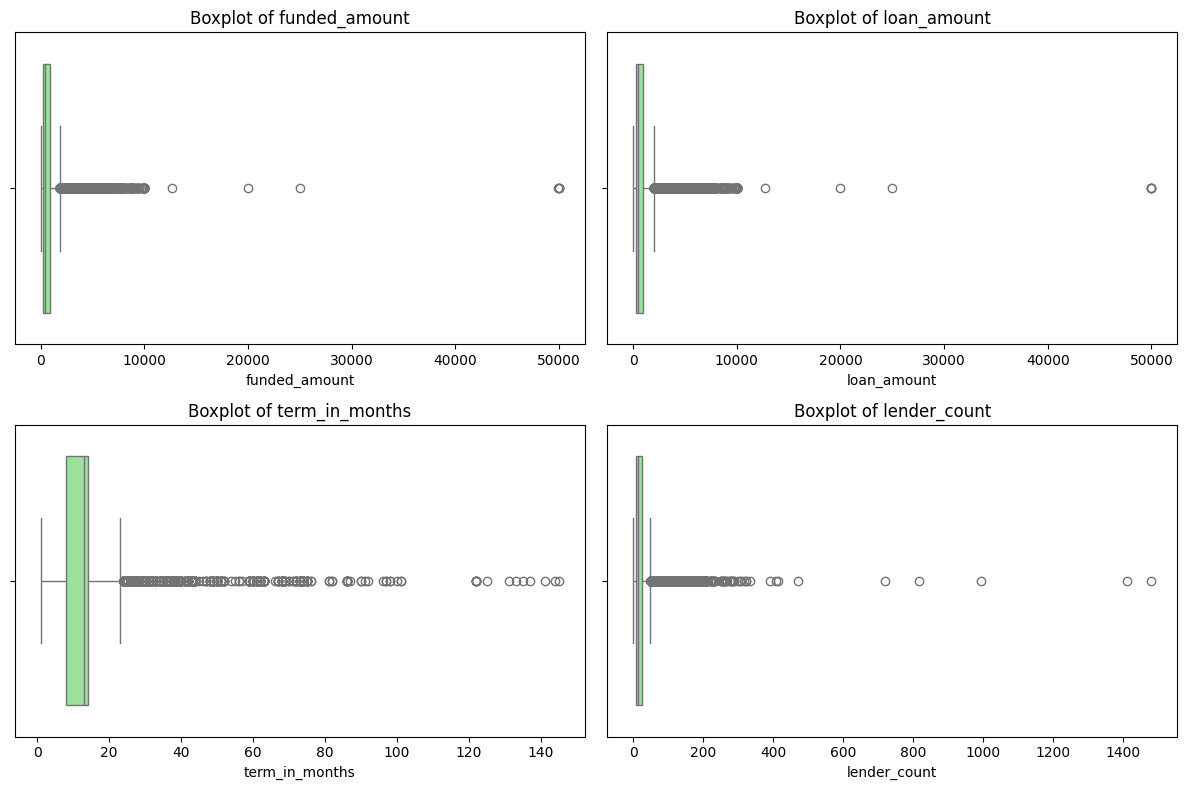

In [ ]:
plt.figure(figsize=(12, 8))

for i, column in enumerate(numeric_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df[column], color='lightgreen')
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
plt.tight_layout()
plt.show()

In [ ]:
def handling_outliers(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower, upper)

for col in numeric_cols:
    handling_outliers(col)

In [ ]:
df.to_csv('Cleaned_masked_kiva_loans.csv', index=False)

# Data visualization

## Categorical Data

<Axes: xlabel='sector'>

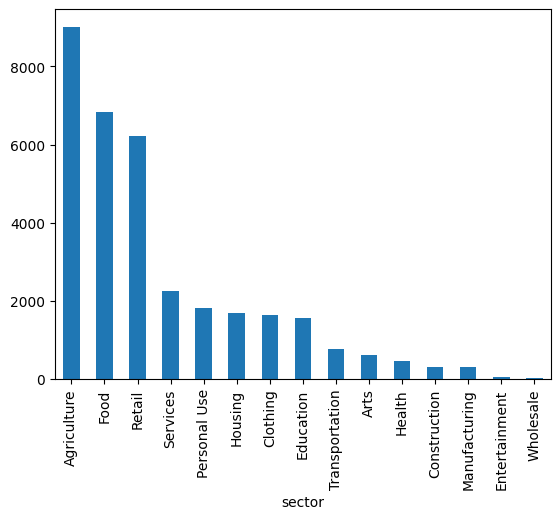

In [ ]:
df['sector'].value_counts().plot(kind='bar')

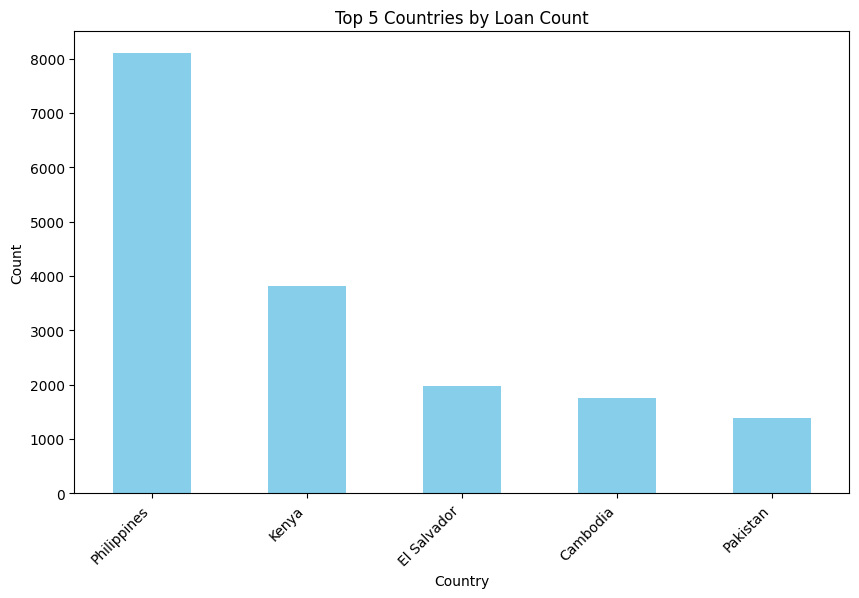

In [ ]:
df['country'].value_counts().head(5).plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Top 5 Countries by Loan Count')
plt.xticks(rotation=45, ha='right')
plt.show()

<Axes: xlabel='repayment_interval'>

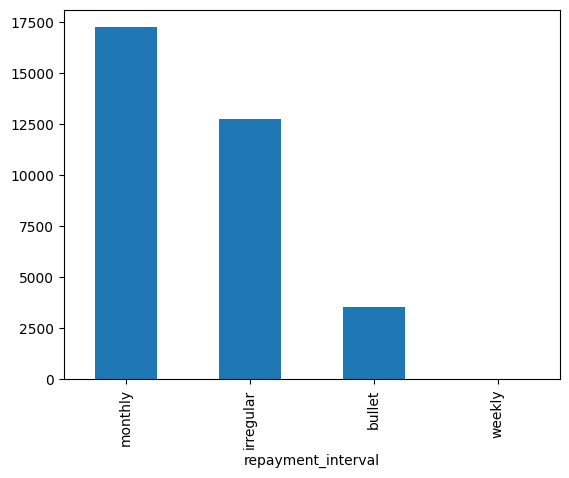

In [ ]:
df['repayment_interval'].value_counts().plot(kind='bar')

<Axes: xlabel='gender_category'>

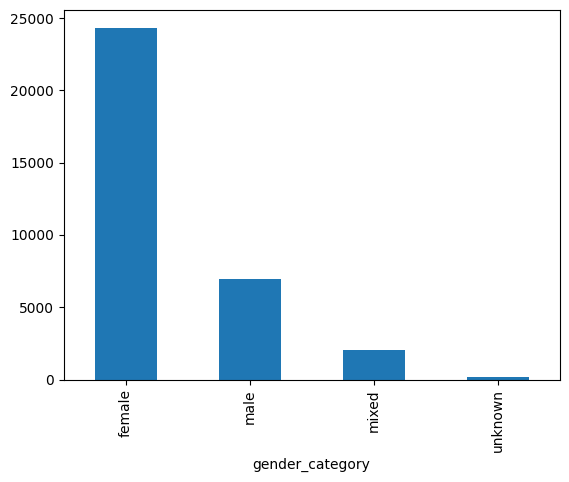

In [ ]:
df['gender_category'].value_counts().plot(kind='bar')

## Continous Data

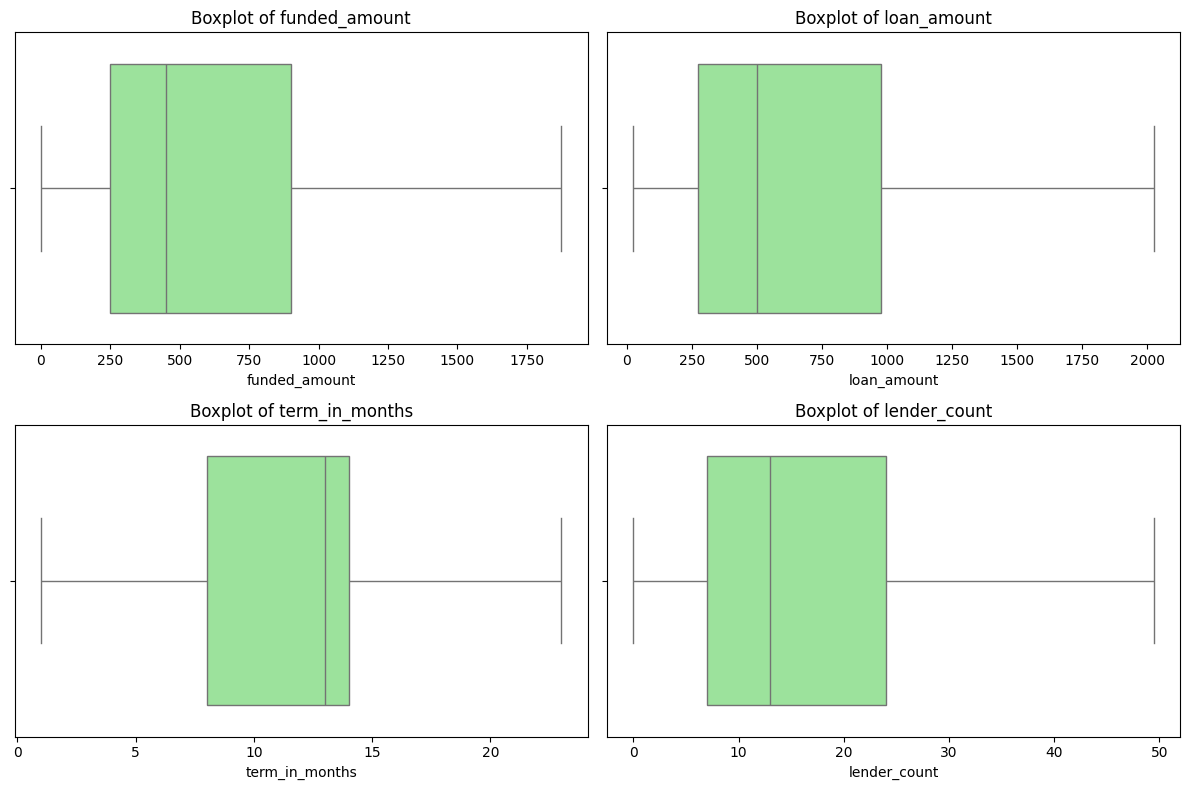

In [ ]:
plt.figure(figsize=(12, 8))
for i, column in enumerate(numeric_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df[column], color='lightgreen')
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
plt.tight_layout()
plt.show()

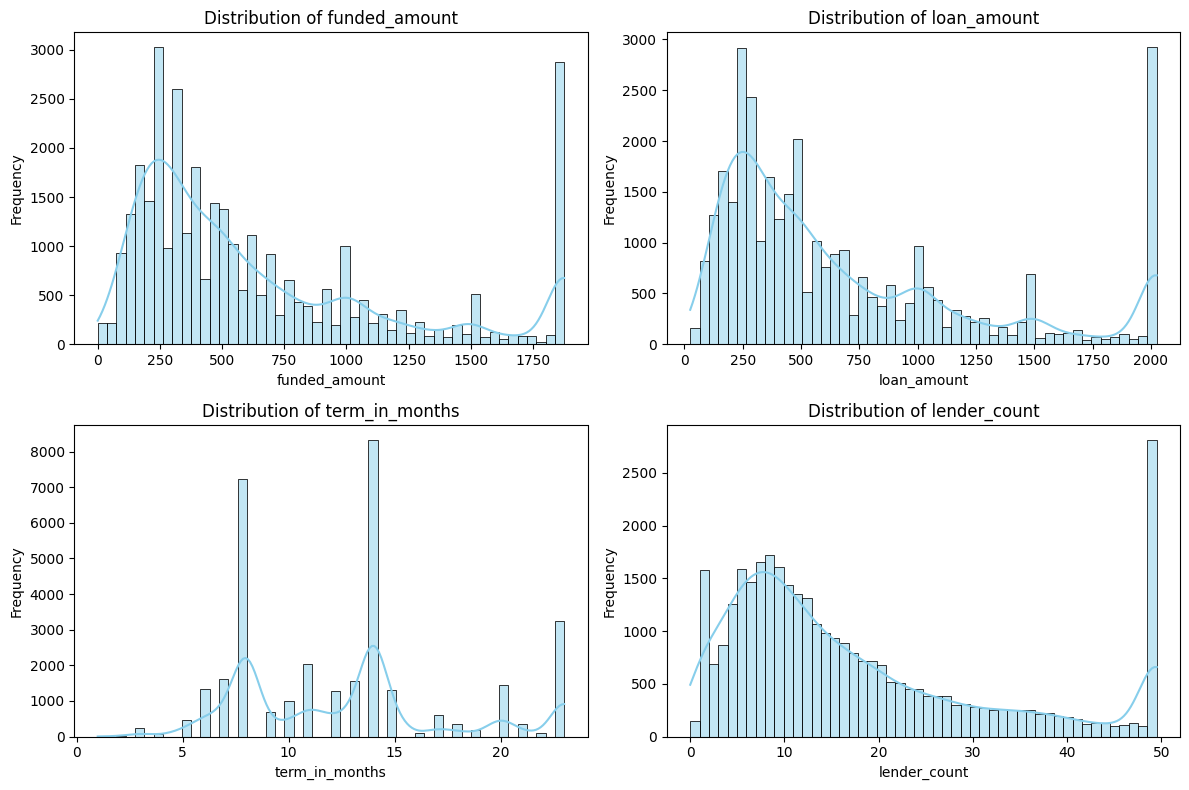

In [ ]:
plt.figure(figsize=(12, 8))
for i, column in enumerate(numeric_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[column], kde=True, bins=50, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

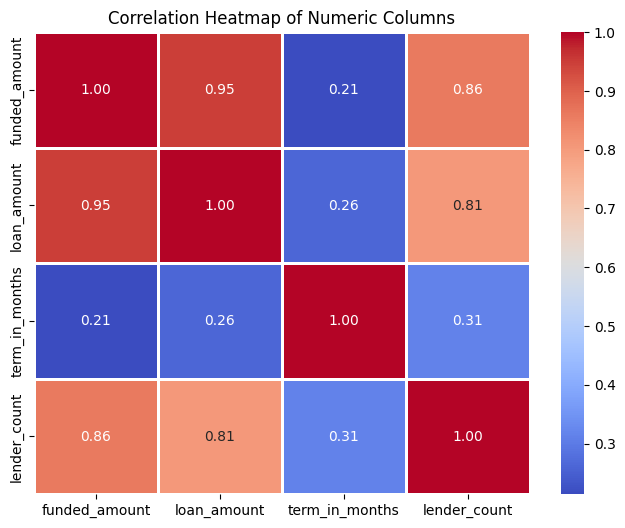

In [ ]:
corr_matrix = df[numeric_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1)
plt.title('Correlation Heatmap of Numeric Columns')
plt.show()

<Figure size 1200x800 with 0 Axes>

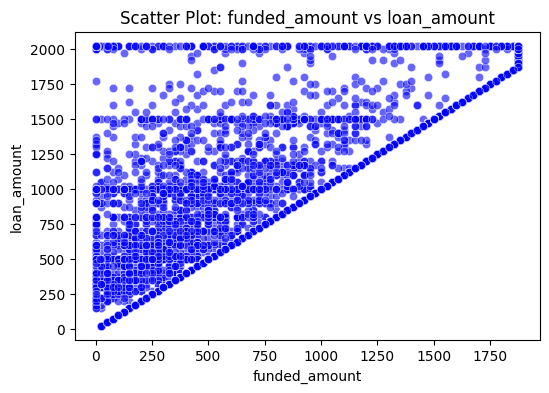

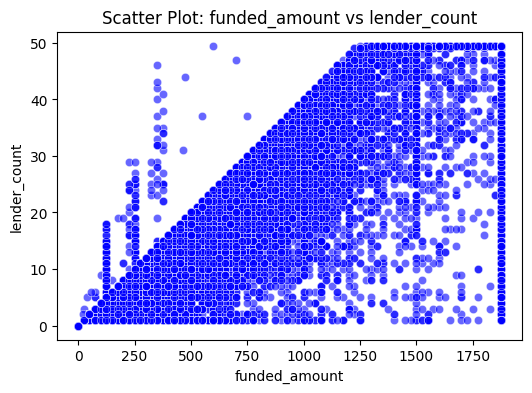

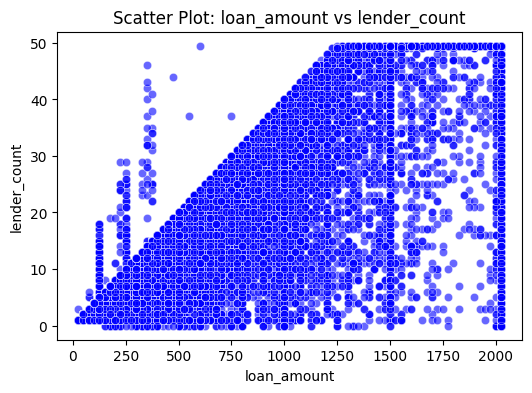

In [ ]:
cols = ['funded_amount', 'loan_amount', 'lender_count']
plt.figure(figsize=(12, 8))
for i, col1 in enumerate(cols):
    for j, col2 in enumerate(cols):
        if i < j:
            plt.figure(figsize=(6, 4))
            sns.scatterplot(x=df[col1], y=df[col2], alpha=0.6, color='blue')
            plt.title(f'Scatter Plot: {col1} vs {col2}')
            plt.xlabel(col1)
            plt.ylabel(col2)
            plt.show()

# Machine learning

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## Data Preparation

In [ ]:
numerical_features = ['loan_amount', 'term_in_months', 'lender_count']
categorical_features = ['sector', 'country', 'repayment_interval', 'gender_category']
target = 'funded_amount'
X = df[numerical_features + categorical_features]
y = df[target]
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])
X_processed = preprocessor.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

## Linear Regression

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)
print("Linear Regression Evaluation:")
print(f"MSE: {mean_squared_error(y_test, y_pred_lin):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_lin)):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_lin):.2f}")
print(f"R-squared (R2): {r2_score(y_test, y_pred_lin):.2f}")

Linear Regression Evaluation:
MSE: 18093.80
RMSE: 134.51
MAE: 72.86
R-squared (R2): 0.94


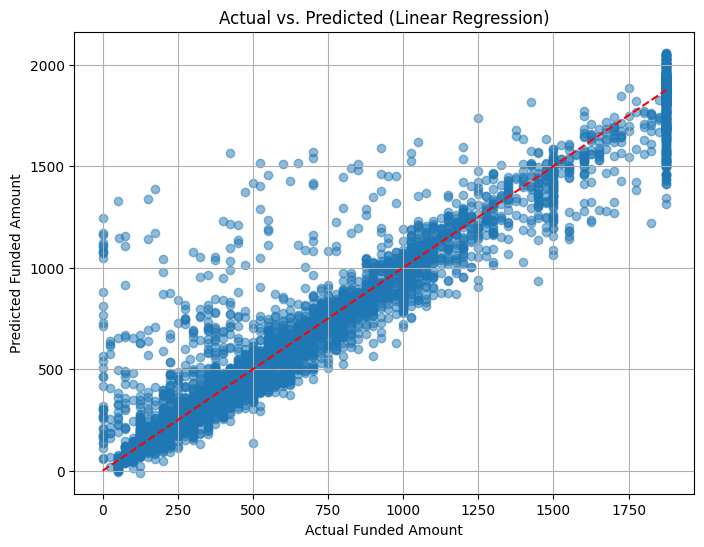

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lin, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Funded Amount')
plt.ylabel('Predicted Funded Amount')
plt.title('Actual vs. Predicted (Linear Regression)')
plt.grid(True)
plt.show()

## Decision Tree Regressor


In [ ]:
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)
y_pred_tree = tree_reg.predict(X_test)
print("Decision Tree Evaluation:")
print(f"MSE: {mean_squared_error(y_test, y_pred_tree):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_tree)):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_tree):.2f}")
print(f"R-squared (R2): {r2_score(y_test, y_pred_tree):.2f}")


Decision Tree Evaluation:
MSE: 14663.31
RMSE: 121.09
MAE: 28.16
R-squared (R2): 0.95


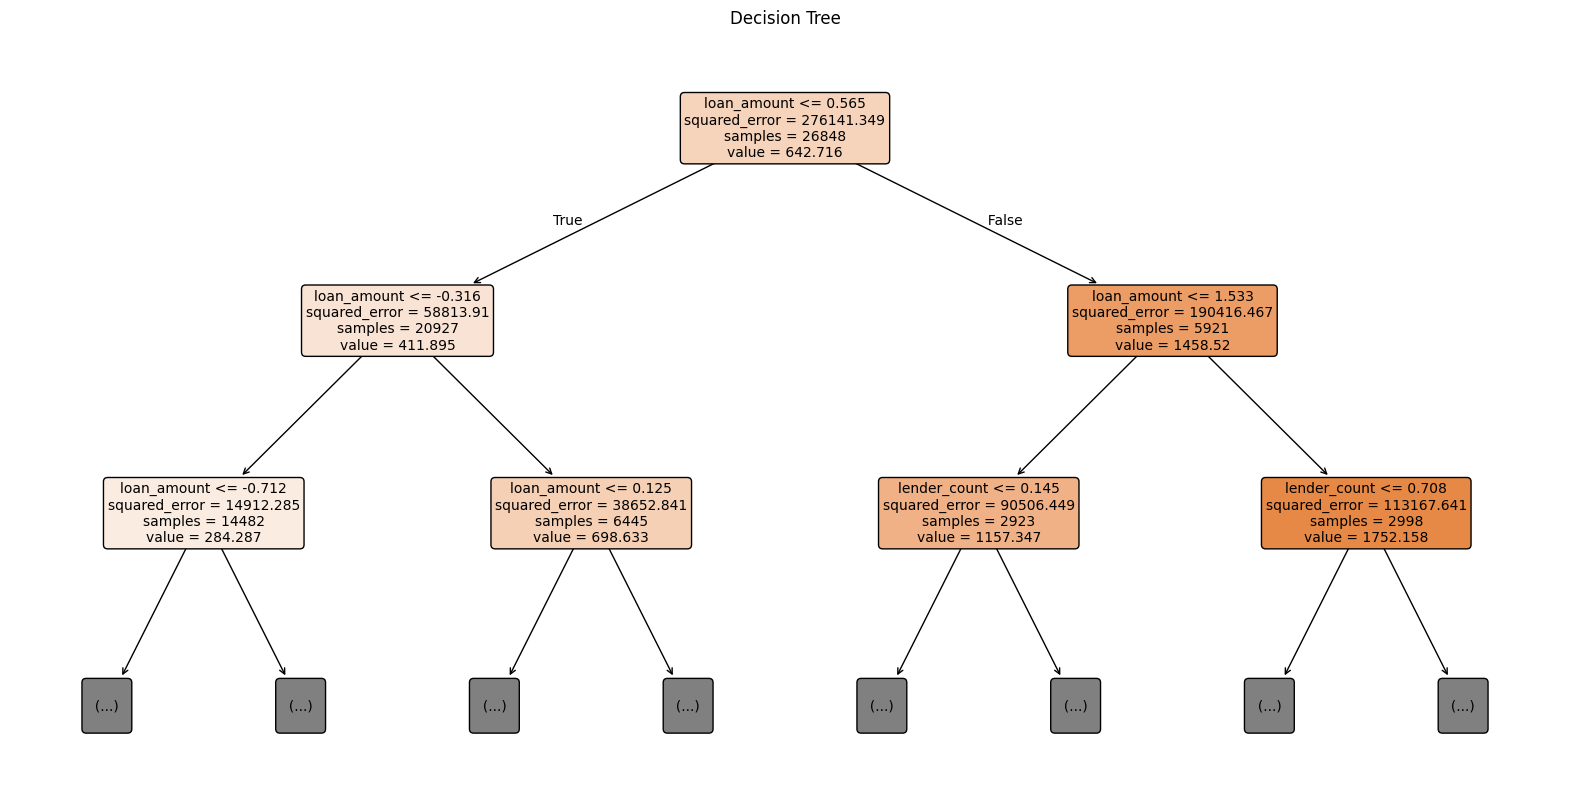

In [ ]:
from sklearn.tree import plot_tree
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoder.fit(df[categorical_features])
plt.figure(figsize=(20, 10))
plot_tree(
    tree_reg,
    feature_names=numerical_features + list(encoder.get_feature_names_out()),
    filled=True,
    rounded=True,
    fontsize=10,
    max_depth=2
)
plt.title("Decision Tree")
plt.show()

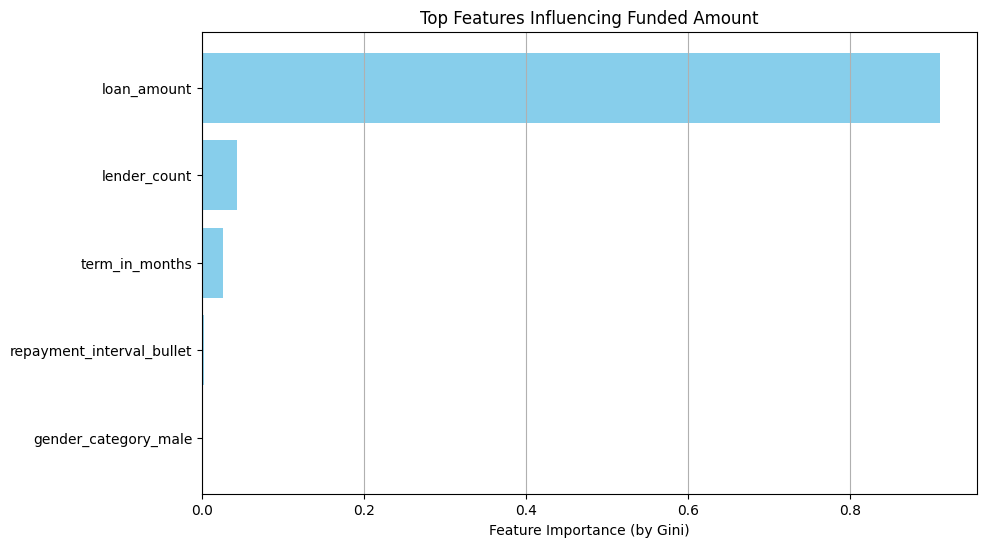

In [ ]:
importances = tree_reg.feature_importances_
feature_names = numerical_features + list(encoder.get_feature_names_out())
sorted_idx = np.argsort(importances)[::-1]
top_features = 5
plt.figure(figsize=(10, 6))
plt.barh(
    np.array(feature_names)[sorted_idx][:top_features],
    importances[sorted_idx][:top_features],
    color='skyblue'
)
plt.xlabel("Feature Importance (by Gini)")
plt.title("Top Features Influencing Funded Amount")
plt.gca().invert_yaxis()
plt.grid(True, axis='x')
plt.show()

## Random Forest Regressor


In [ ]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred_rand = model.predict(X_test)
print("Random Forest Evaluation:")
print(f"MSE: {mean_squared_error(y_test, y_pred_rand):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_rand)):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_rand):.2f}")
print(f"R-squared (R2): {r2_score(y_test, y_pred_rand):.2f}")

Random Forest Evaluation:
MSE: 8185.14
RMSE: 90.47
MAE: 25.08
R-squared (R2): 0.97


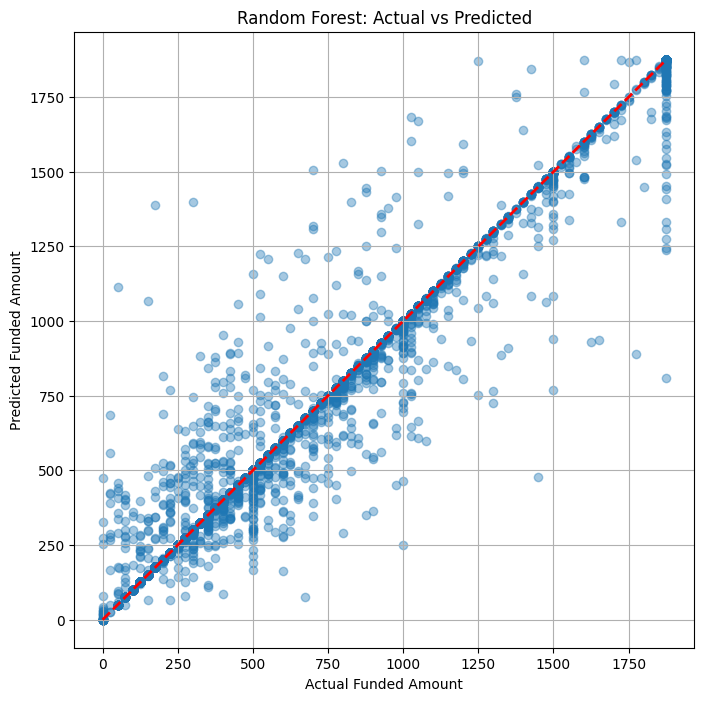

In [ ]:
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred_rand, alpha=0.4)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', linewidth=2)
plt.xlabel("Actual Funded Amount")
plt.ylabel("Predicted Funded Amount")
plt.title("Random Forest: Actual vs Predicted")
plt.grid(True)
plt.show()

## Random Forest Regressor is the best one

# Analytical Questions

## Which sectors receive the highest amount of funding, and how does this change over time?

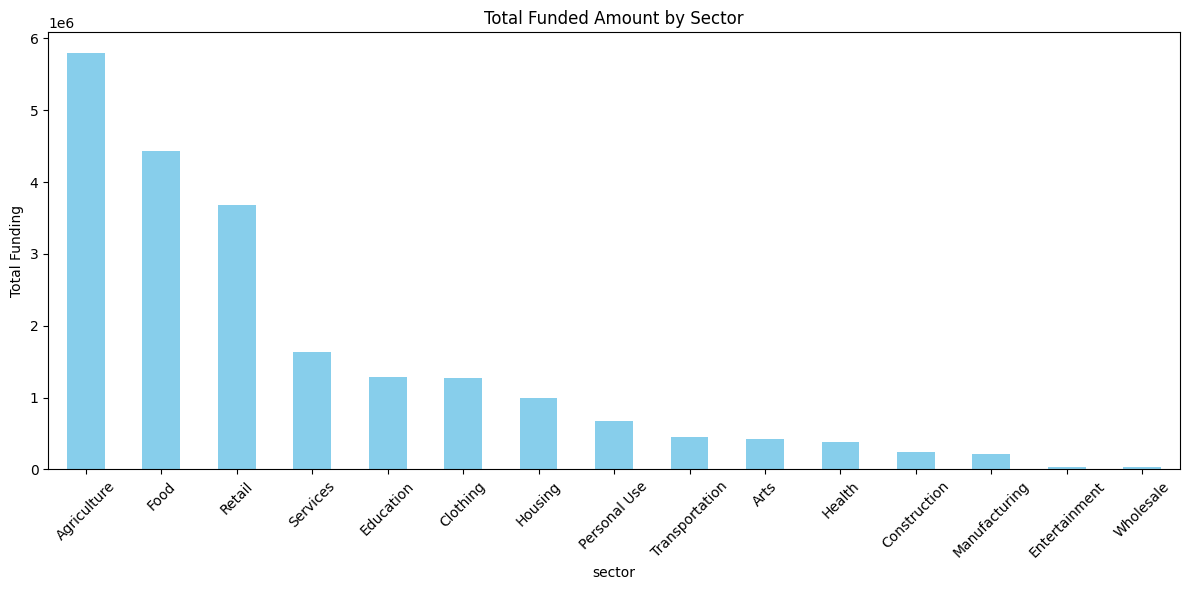

In [ ]:
sector_funding = df.groupby('sector')['funded_amount'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sector_funding.plot(kind='bar', color='skyblue')
plt.title('Total Funded Amount by Sector')
plt.ylabel('Total Funding')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

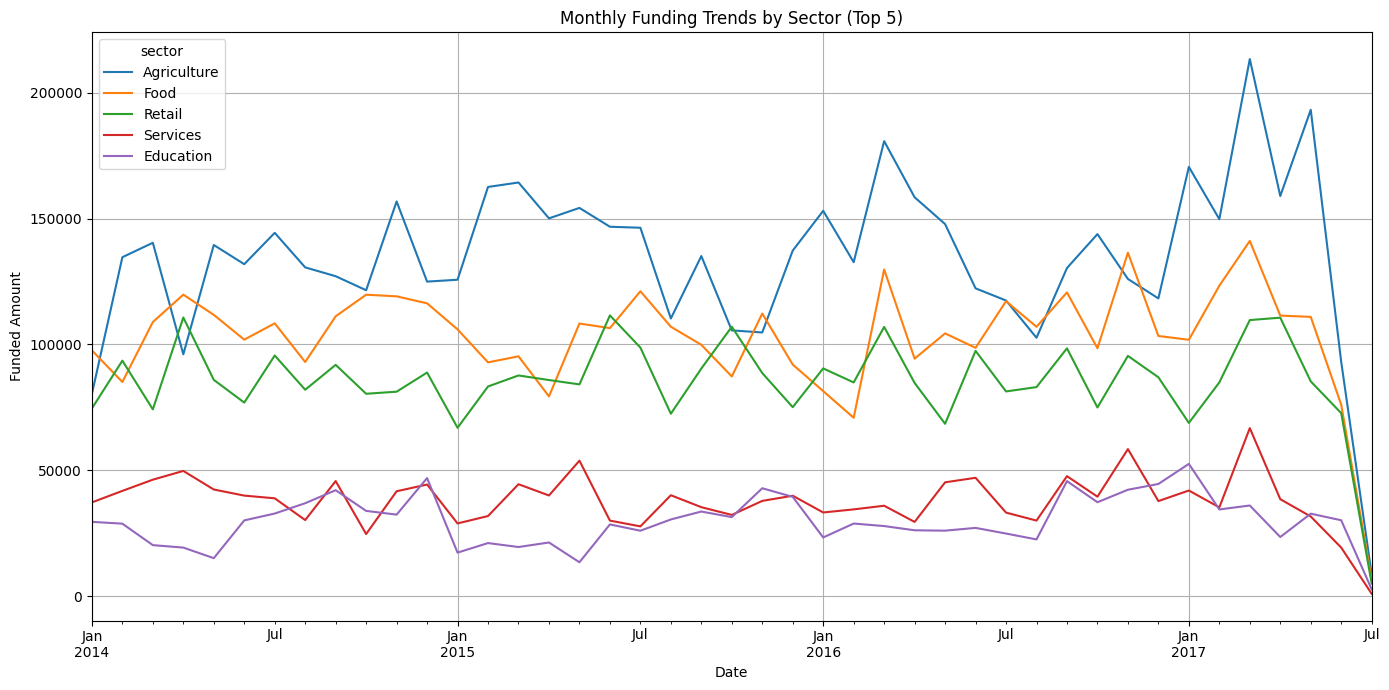

In [ ]:
df['year_month'] = df['date'].dt.to_period('M')
sector_trends = df.groupby(['year_month', 'sector'])['funded_amount'].sum().unstack()
#top 5 sectors
top_sectors = sector_funding.head(5).index
sector_trends[top_sectors].plot(figsize=(14, 7))
plt.title('Monthly Funding Trends by Sector (Top 5)')
plt.ylabel('Funded Amount')
plt.xlabel('Date')
plt.grid(True)
plt.tight_layout()
plt.show()

## Is there a correlation between the number of lenders and the funded loan amount?

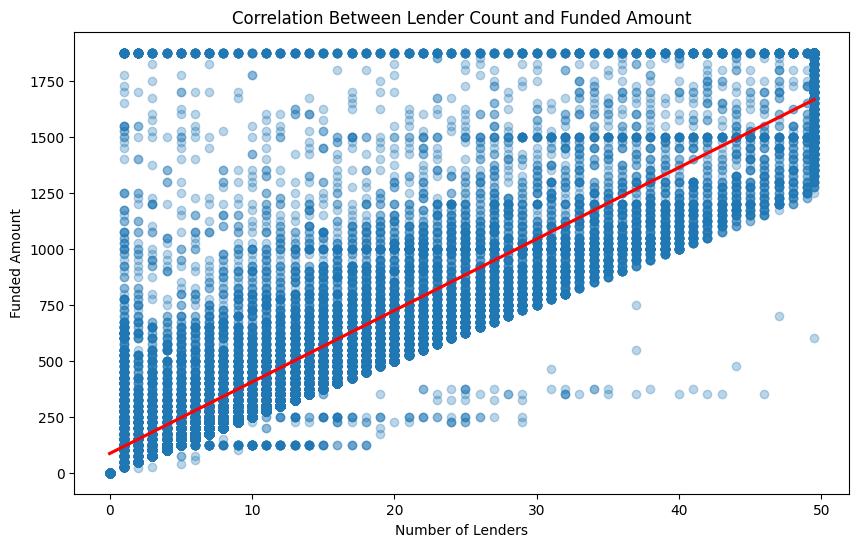

Pearson Correlation Coefficient: 0.86


In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(x='lender_count', y='funded_amount', data=df,
            scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('Correlation Between Lender Count and Funded Amount')
plt.xlabel('Number of Lenders')
plt.ylabel('Funded Amount')
plt.show()

correlation = df[['lender_count', 'funded_amount']].corr().iloc[0,1]
print(f"Pearson Correlation Coefficient: {correlation:.2f}")

#  Time Series

In [ ]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
arima_data =df[['funded_amount', 'date']].copy()
arima_data['date'] =pd.to_datetime(arima_data['date'])
arima_data.head()

,funded_amount,date
0,500,2017-02-20
1,325,2016-10-11
2,800,2016-07-25
3,425,2017-06-02
4,275,2015-03-25


In [ ]:
Time_series = arima_data.groupby('date')['funded_amount'].sum().reset_index()

In [ ]:
Time_series.set_index('date', inplace=True)

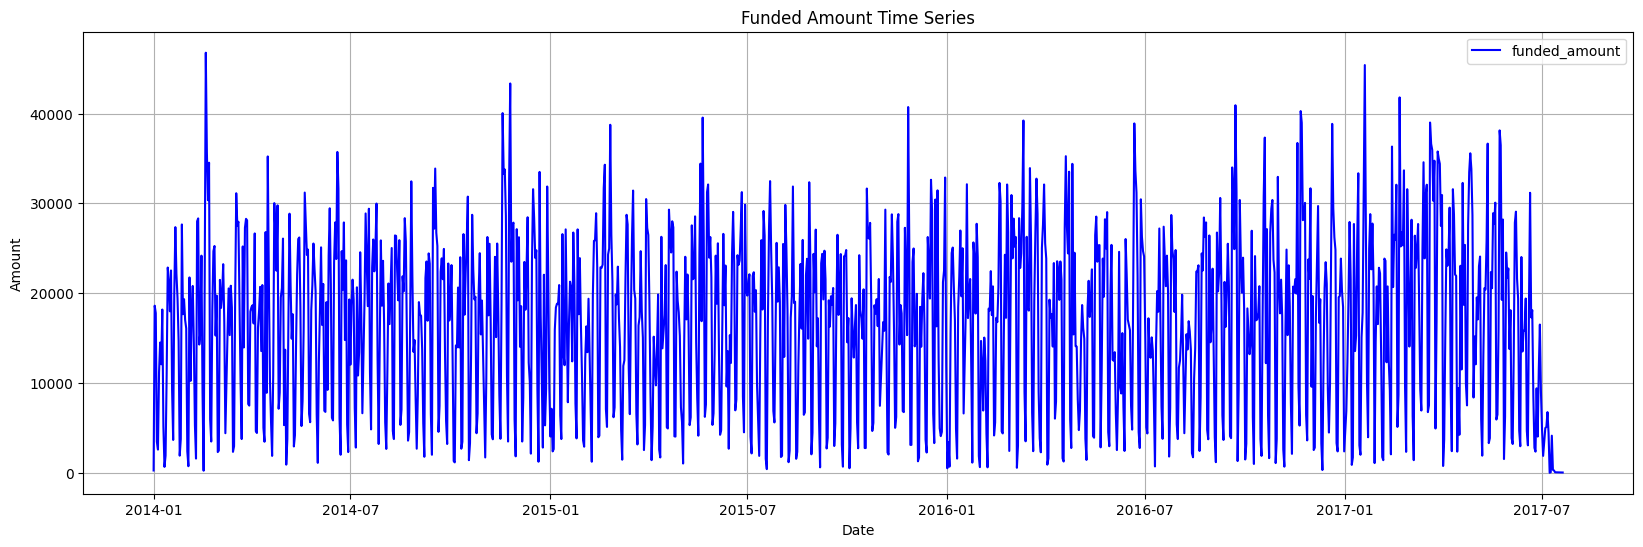

In [ ]:
plt.figure(figsize=(20, 6))
plt.plot(Time_series.index, Time_series['funded_amount'], label='funded_amount', color='blue')
plt.title('Funded Amount Time Series')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.legend(loc='best')
plt.grid(True)
plt.show()

C:\Users\Mariam\AppData\Local\Temp\ipykernel_12492\2069833595.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  Time_series_monthly = Time_series.resample('M').sum()


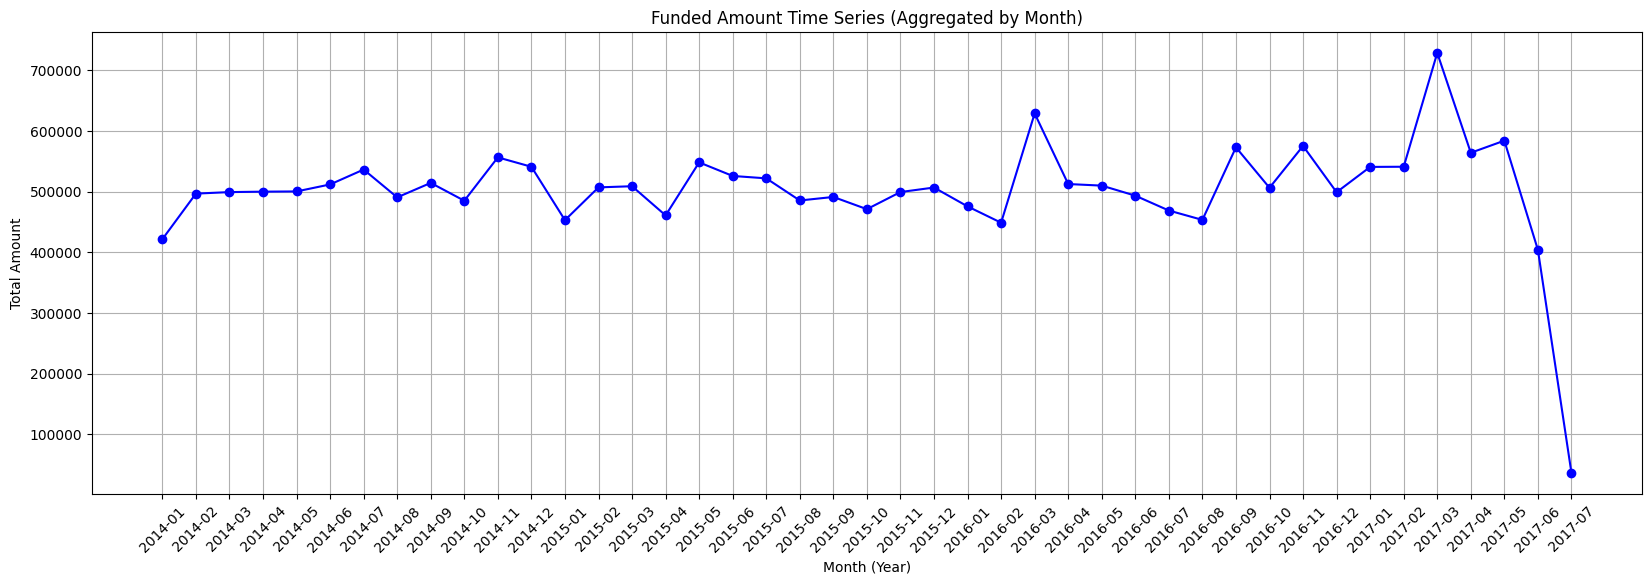

In [ ]:
#Time series data by month
Time_series_monthly = Time_series.resample('M').sum()
plt.figure(figsize=(20, 6))
plt.plot(Time_series_monthly.index.strftime('%Y-%m'), Time_series_monthly['funded_amount'], marker='o', linestyle='-', color='blue')
plt.title('Funded Amount Time Series (Aggregated by Month)')
plt.xlabel('Month (Year)')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


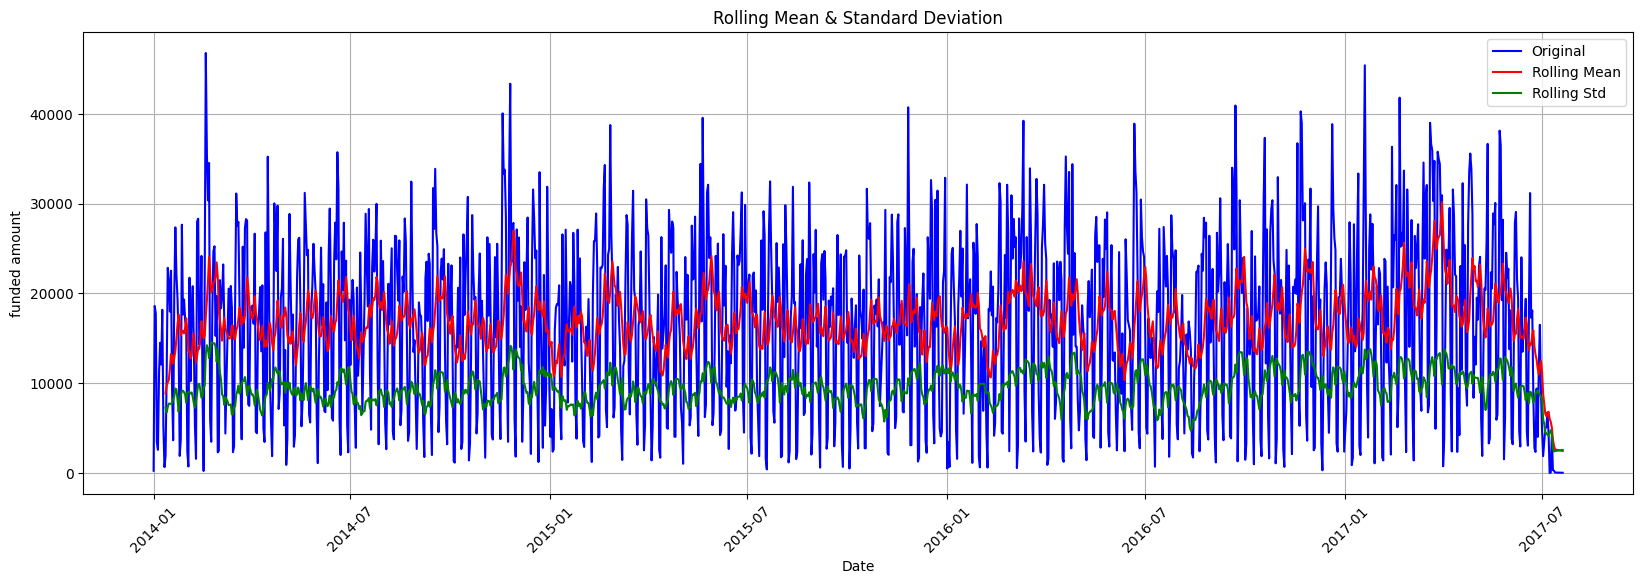

ADF Statistic: -5.510888587292816
p-value: 1.973373122422524e-06
Critical Values:
	1%: -3.4355381554821585
	5%: -2.8638311143598556
	10%: -2.567989813198476


In [ ]:
def stationarize_series(series):
    rolling_mean = series.rolling(window=12).mean()
    rolling_std = series.rolling(window=12).std()
    plt.figure(figsize=(20, 6))
    plt.plot(series, label='Original', color='blue')
    plt.plot(rolling_mean, label='Rolling Mean', color='red')
    plt.plot(rolling_std, label='Rolling Std', color='green')
    plt.title('Rolling Mean & Standard Deviation')
    plt.xlabel('Date')
    plt.xticks(rotation=45)
    plt.ylabel('funded amount')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()
    result = adfuller(series)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))
stationarize_series( Time_series['funded_amount'])

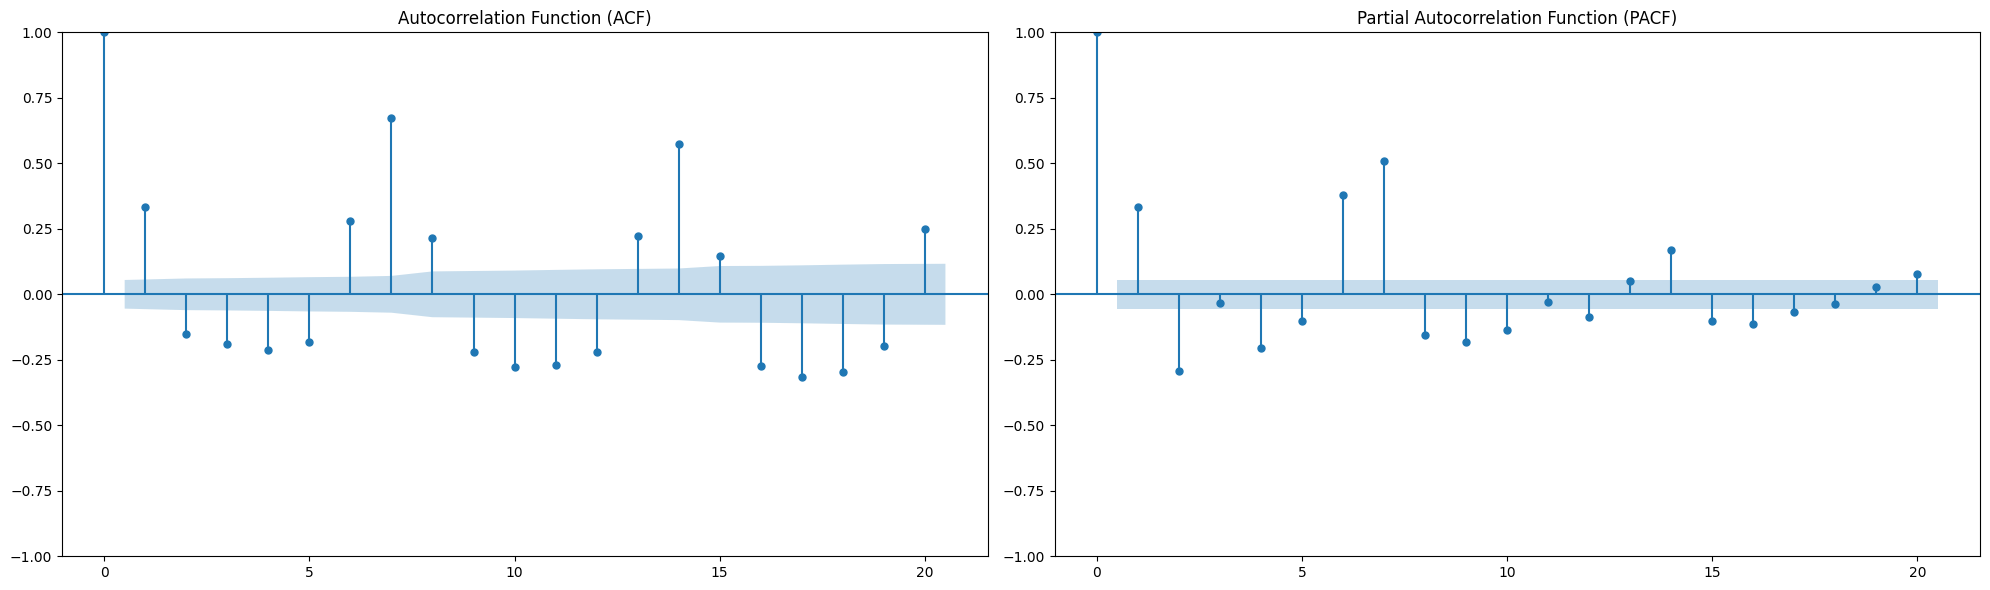

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))
plot_acf(Time_series.funded_amount.dropna(), ax=ax1, lags=20, title='Autocorrelation Function (ACF)')
plot_pacf(Time_series.funded_amount.dropna(), ax=ax2, lags=20, title='Partial Autocorrelation Function (PACF)')
plt.tight_layout()
plt.show()

In [ ]:
train_size = int(len(Time_series) * 0.8)
train, test = Time_series[:train_size], Time_series[train_size:]

In [ ]:
model = ARIMA(train['funded_amount'], order=(14,0,14))
arima_model = model.fit()

C:\Users\Mariam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Mariam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Mariam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when 

In [ ]:
start = len(train)
end = len(train) + len(test) - 1
pred = arima_model.predict(start=start, end=end,typ = 'levels')
pred.index= Time_series.index[start:end+1]

print(pred)

date
2016-10-30     3945.612710
2016-10-31    20162.803098
2016-11-01    24274.185602
2016-11-02    22113.537548
2016-11-03    16883.567126
                  ...     
2017-07-10    18098.912418
2017-07-11    22917.055181
2017-07-12    21034.019557
2017-07-13    14838.411382
2017-07-20     9035.361293
Name: predicted_mean, Length: 257, dtype: float64


C:\Users\Mariam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Mariam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\Mariam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a Typ

<Axes: xlabel='date'>

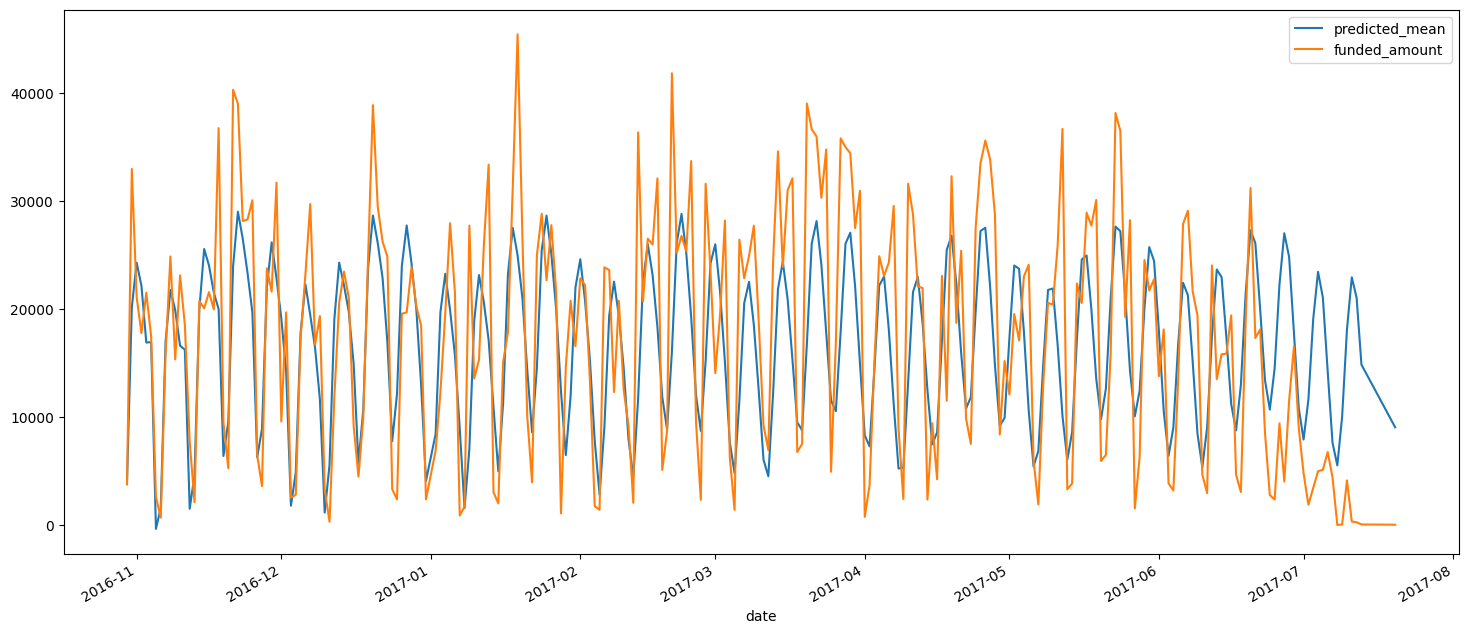

In [ ]:
pred.plot(figsize=(18,8),legend = True)
test['funded_amount'].plot(legend = True )

In [ ]:
print("ARIMA Evaluation:")
print(f"MSE: {mean_squared_error(test['funded_amount'], pred):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(test['funded_amount'], pred)):.2f}")
print(f"MAE: {mean_absolute_error(test['funded_amount'], pred):.2f}")
print(f"R-squared (R2): {r2_score(test['funded_amount'], pred):.2f}")

ARIMA Evaluation:
MSE: 72529998.29
RMSE: 8516.45
MAE: 6540.31
R-squared (R2): 0.42


C:\Users\Mariam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Mariam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\Mariam\AppData\Local\Temp\ipykernel_12492\1471101176.py:12: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  plt.plot(forecast_index, forecast, label='Forecast', color='red')


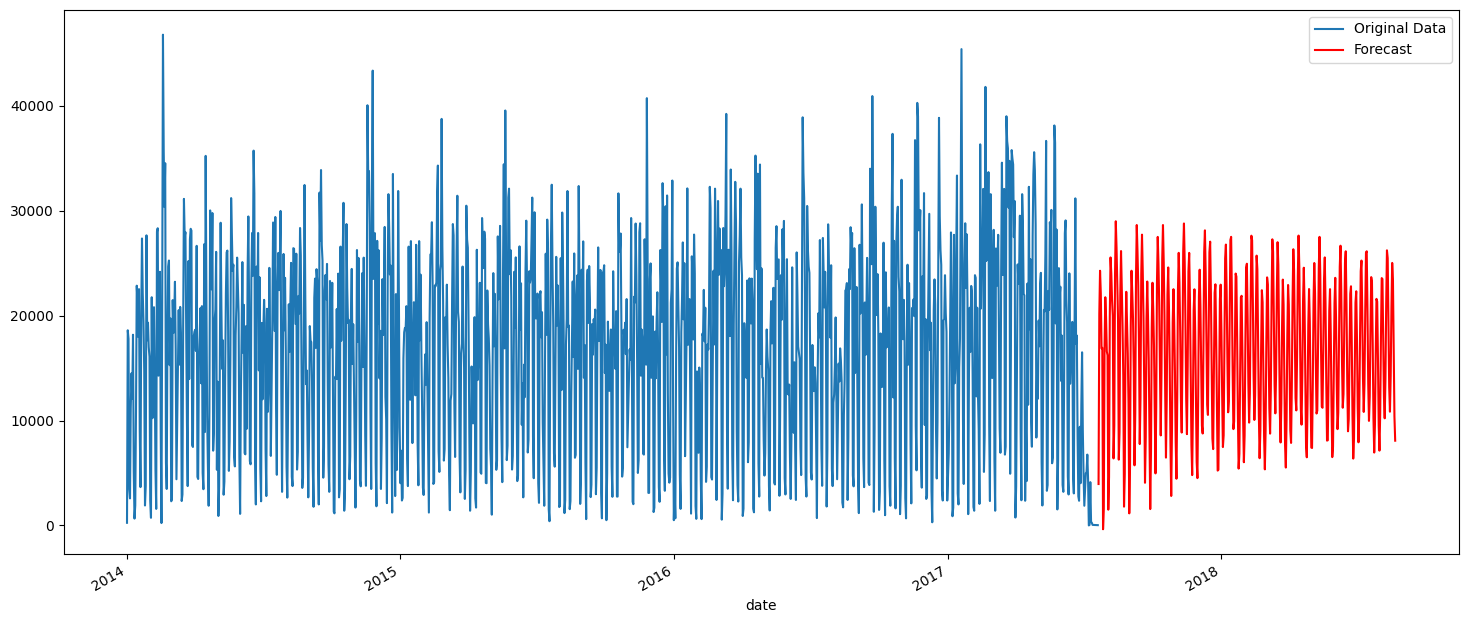

In [ ]:
start_date = '2017-07-21'
end_date = '2018-08-21'

start_date = pd.to_datetime(start_date)
end_date = pd.to_datetime(end_date)

forecast = arima_model.forecast(steps=len(pd.date_range(start=start_date, end=end_date, freq=Time_series.index.freq)))
forecast_index = pd.date_range(start=start_date, end=end_date, freq=Time_series.index.freq)

plt.figure(figsize=(18, 8))
Time_series['funded_amount'].plot(label='Original Data')
plt.plot(forecast_index, forecast, label='Forecast', color='red')
plt.legend()
plt.show()